# Exercise 2: Data Processing and Analysis

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    import otter
    grader = otter.Notebook()
except:

    !pip install otter-grader
    import otter
    grader = otter.Notebook()



"""
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check
    
"""

'\ntry:\n    from gofer.ok import check\nexcept:\n    %pip install git+https://github.com/grading/gradememaybe.git\n    from gofer.ok import check\n    \n'

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [3]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [4]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [5]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate)
print(maximumHeartRate)

40.0
296.5939695131042


In [69]:
#check('tests/q1.py')

grader.check('q1.py')

FileNotFoundError: Test q1.py does not exist

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [7]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [8]:
print(outlierHeartRaterows)

print(nullHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [9]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

#~ = is not (! in R)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [10]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [11]:
#mean imputation
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


outlierHeartRaterows

/tmp/ipykernel_79182/3574318386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_79182/3574318386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [12]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

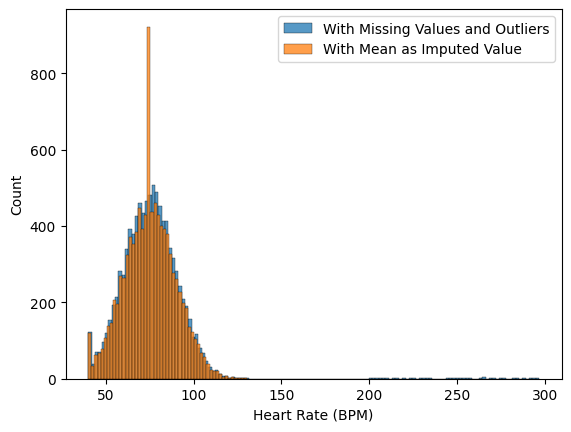

In [13]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 
The median channges very slightly between the original smartwatch median (75.22) and the table with mean imputation (75.13). This means that the median isn't signficantly changing after doing mean imputation on the missing or outlier variables. 
...

In [14]:
## coding cell to check the difference in median values 

fullTableHR_med = smartwatch_hr['Heart Rate (BPM)'].median()
fullTableOG_med = smartwatch['Heart Rate (BPM)'].median()

print(fullTableHR_med)
print(fullTableOG_med)


75.13268404820141
75.22060125775644


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
#finding min and max of Blook Oxygen Level 
minBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].min()
maxBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].max()

print(minBloodO2)
print(maxBloodO2)

#finding mean (with outliers/null)
meanBloodO2 = smartwatch_hr['Blood Oxygen Level (%)'].mean()

print(meanBloodO2)

90.79120814564097
100.0
97.84158102099076


In [16]:
#grader.check('q2')

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

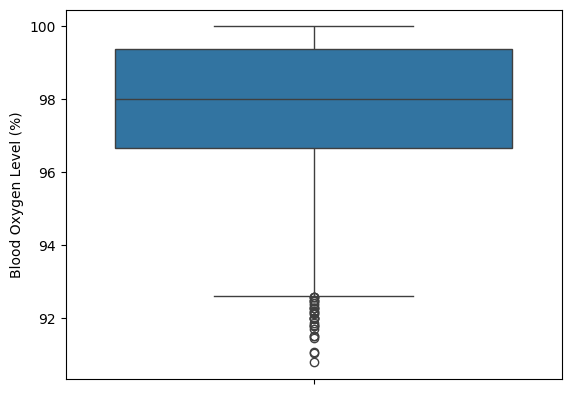

In [17]:
sns.boxplot(smartwatch_hr['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

....

In [18]:
## use this space or additional cells to deal with the missing/outlier values. 

#identifying the outliers
outlierBloodO2rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 92.5]
nullBloodO2rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]

print(outlierBloodO2rows)
print(nullBloodO2rows)

# creating a new df where retain only cases with blood oxygen > 92.5 and no null data
bloodO2rows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isna()) & (smartwatch_hr['Blood Oxygen Level (%)'] > 92.5)]

#print number of cases left 
print(len(bloodO2rows))

print(len(smartwatch)) #number of original cases

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
389    4991.0         89.812696               92.003999   3197.915998   
548    1833.0         78.880652               92.109389   2274.291267   
773    3914.0         74.337231               92.288167   2482.815316   
859    2388.0         43.259383               92.482382    994.697587   
944    3703.0         84.058395               91.062167   9390.095074   
1179   3692.0         89.396977               91.507534   2790.919612   
1778   1395.0         74.038855               92.483740           NaN   
2263   1425.0         43.767314               92.282996   3069.225843   
2316   2265.0        102.533707               91.514026   1015.818664   
2443   3253.0         52.514029               92.368105   3488.384199   
2698   3113.0         78.345556               91.034463  15758.278107   
4048   2749.0         87.110612               92.192058  18406.286003   
4114   1258.0         97.254386               92.48

In [19]:
#checking proportions
print((len(bloodO2rows)/len(smartwatch_hr))*100)

#shows that 96% of the original data would be retained 

96.73


In [20]:
#comapring means with outliers and null compared to df without

#calculating mean of Blood Oxygen (no null/outliers)
bloodO2rowsMean = bloodO2rows['Blood Oxygen Level (%)'].mean()
print(bloodO2rowsMean) 
print(meanBloodO2) #original mean with NAs/outliers

#means have not changed significantly, however, taking out 300 cases because of missing or outlier data may not work well if there are other measures with missing data as well. 

97.85808984342573
97.84158102099076


In [21]:
#Mean imputation method - next method

#creating two new df for mean imputation that are equal to the rows already pulled out
outlierBloodO2_meanimp = outlierBloodO2rows
nullBloodO2_meanimp = nullBloodO2rows

#mean imputation 
outlierBloodO2_meanimp['Blood Oxygen Level (%)'] = bloodO2rowsMean
nullBloodO2_meanimp['Blood Oxygen Level (%)'] = bloodO2rowsMean

#checking mean imputation means vs. original
bloodO2_meanimp = pd.concat([outlierBloodO2_meanimp, nullBloodO2_meanimp, bloodO2rows])

fullTableBloodMean = bloodO2_meanimp['Blood Oxygen Level (%)'].mean()
print(fullTableBloodMean)
print(len(bloodO2_meanimp))


#97.85808984342573 mean if you do mean imputation

97.85808984342573
10000


/tmp/ipykernel_79182/2012045111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierBloodO2_meanimp['Blood Oxygen Level (%)'] = bloodO2rowsMean
/tmp/ipykernel_79182/2012045111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullBloodO2_meanimp['Blood Oxygen Level (%)'] = bloodO2rowsMean


10000


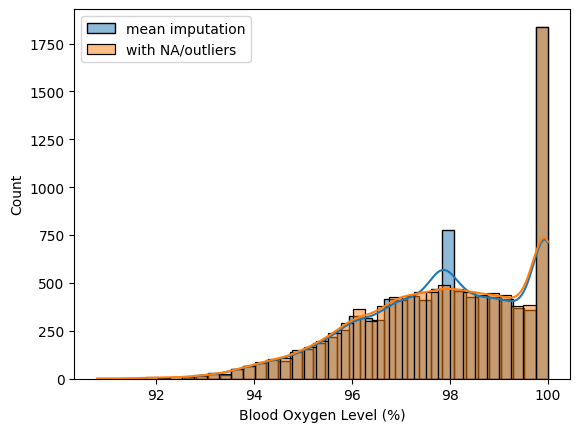

In [22]:
#final choice: mean imputation
#why? Mean imputation allows you to keep all of your rows, especially as you are cleaning data for multiple cols
smartwatch_o2 = bloodO2_meanimp

smartwatch_o2

#checking to make sure have right df
print(len(bloodO2_meanimp))

#visualizations
sns.histplot(smartwatch_o2['Blood Oxygen Level (%)'], kde= True, label = "mean imputation")
sns.histplot(smartwatch['Blood Oxygen Level (%)'], kde= True, label = "with NA/outliers")
plt.legend()

#citations
#https://seaborn.pydata.org/generated/seaborn.histplot.html 

Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [23]:
minSteps = smartwatch_o2['Step Count'].min()

maxSteps = smartwatch_o2['Step Count'].max()

stepsMean = smartwatch_o2['Step Count'].mean()

print(minSteps)
print(maxSteps)
print(stepsMean)


0.9101380609604088
62486.690753464914
6985.685884992229


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
389    4991.0         89.812696               97.858090   3197.915998   
548    1833.0         78.880652               97.858090   2274.291267   
773    3914.0         74.337231               97.858090   2482.815316   
859    2388.0         43.259383               97.858090    994.697587   
944    3703.0         84.058395               97.858090   9390.095074   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
389       6.867673807383509            NaN            7  
548    

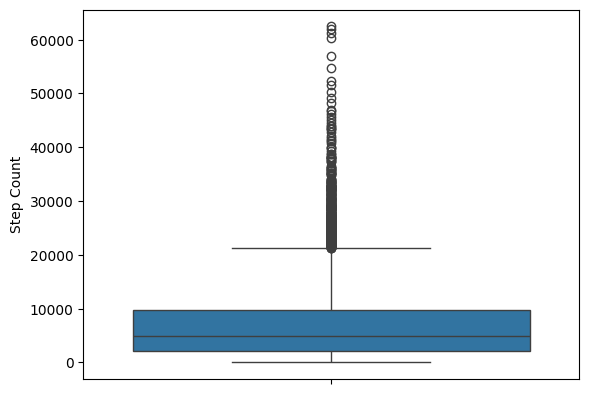

In [24]:
#determining threshold based off of average steps americans take in a day

#seeing how many outliers based on boxplot
sns.boxplot(smartwatch_o2['Step Count'])

#going to do IQR method bc of the extreme outliers in the data 
stepsQ1 = smartwatch_o2['Step Count'].quantile(.25)
stepsQ3 = smartwatch_o2['Step Count'].quantile(.75)

IQR = stepsQ3 - stepsQ1
lowerlim = stepsQ1 - 1.5*IQR
upperlim = stepsQ3 + 1.5*IQR

#creating df identifying outliers via IQR method
stepRows = smartwatch_o2[(smartwatch_o2['Step Count'] < upperlim) & (smartwatch_o2['Step Count'] > lowerlim) & (~smartwatch_o2['Step Count'].isnull())]

print(stepRows)

print(len(smartwatch_o2['Step Count']))
print(len(stepRows['Step Count']))

#help calculating IQR range in python 
#https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
#https://www.geeksforgeeks.org/numpy-quantile-in-python/




<Axes: ylabel='Step Count'>

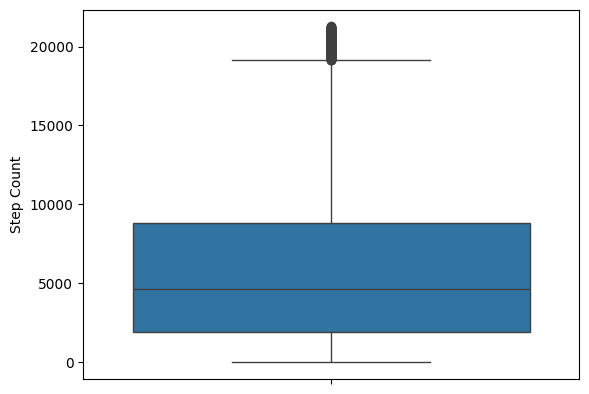

In [25]:
#new data without outliers 
sns.boxplot(stepRows['Step Count'])

In [26]:
#determine outliers IQR method
outlierStepRows = smartwatch_o2[(smartwatch_o2['Step Count'] > upperlim) | (smartwatch_o2['Step Count'] < lowerlim)] 
nullStepRows = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]

print(len(outlierStepRows))
print(len(nullStepRows))


446
100


In [27]:
#mean without outliers/na
stepRowsMean = stepRows['Step Count'].mean()
print(stepRowsMean)

#mean imputation
outlierStep_imp = outlierStepRows
nullStep_imp = nullStepRows

outlierStep_imp['Step Count'] = stepRowsMean
nullStep_imp['Step Count'] = stepRowsMean



5988.294290944984


/tmp/ipykernel_79182/3049844170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierStep_imp['Step Count'] = stepRowsMean
/tmp/ipykernel_79182/3049844170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullStep_imp['Step Count'] = stepRowsMean


In [28]:
#check('tests/q6.py')

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

....

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
8369   2283.0         75.132684               97.858090   5988.294291   
644    3744.0         52.578793               97.858090   5988.294291   
1260   3072.0         95.873161               97.858090   5988.294291   
1779   2555.0         46.441672               97.858090   5988.294291   
1850   1730.0         93.219529               97.858090   5988.294291   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
8369      5.291653956497481  Highly_Active            2  
644    

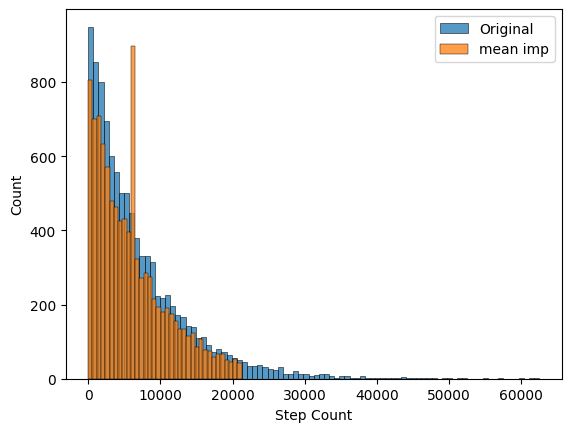

In [29]:
## use this space or additional cells to address the missing or outlier data. 
#mean imputation

#checking mean imputation means vs. original
steps_meanimp = pd.concat([outlierStep_imp, nullStep_imp, stepRows])
print(steps_meanimp)


fullTableSteps = steps_meanimp['Step Count'].mean()
print(fullTableSteps)

#final choice: mean imputation
smartwatch_steps = steps_meanimp





#visual 
sns.histplot(smartwatch_o2['Step Count'], label = "Original")
sns.histplot(smartwatch_steps['Step Count'], label = "mean imp")
plt.legend()

# chose mean imputation due to the likelihood that those extremely high step counts were due to potential error

Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [30]:
minSleep = smartwatch_steps['Sleep Duration (hours)'].min()

minSleep 

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [31]:
for row in smartwatch_steps['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(row)  ## first try to see if it can be converted to a number
    except:
        print(row)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [32]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,5988.294291,ERROR,Actve,3
4651,3070.0,93.153315,97.629232,5988.294291,ERROR,Highly Active,4
4732,3172.0,44.564677,93.509192,5988.294291,ERROR,Seddentary,3
4981,1187.0,80.978300,94.933598,5988.294291,ERROR,Sedentary,3
7216,1498.0,112.891244,97.376654,5988.294291,ERROR,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,ERROR,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [33]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_79182/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,5988.294291,NaN,Actve,3
4651,3070.0,93.153315,97.629232,5988.294291,NaN,Highly Active,4
4732,3172.0,44.564677,93.509192,5988.294291,NaN,Seddentary,3
4981,1187.0,80.978300,94.933598,5988.294291,NaN,Sedentary,3
7216,1498.0,112.891244,97.376654,5988.294291,NaN,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,NaN,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [34]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8369,2283.0,75.132684,97.858090,5988.294291,5.291654,Highly_Active,2
644,3744.0,52.578793,97.858090,5988.294291,4.497473,Sedentary,7
1260,3072.0,95.873161,97.858090,5988.294291,6.175934,Sedentary,2
1779,2555.0,46.441672,97.858090,5988.294291,7.969198,Active,8
1850,1730.0,93.219529,97.858090,5988.294291,5.442775,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [35]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406445))

In [36]:
#check('tests/q8.py')

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

....

<Axes: ylabel='Sleep Duration (hours)'>

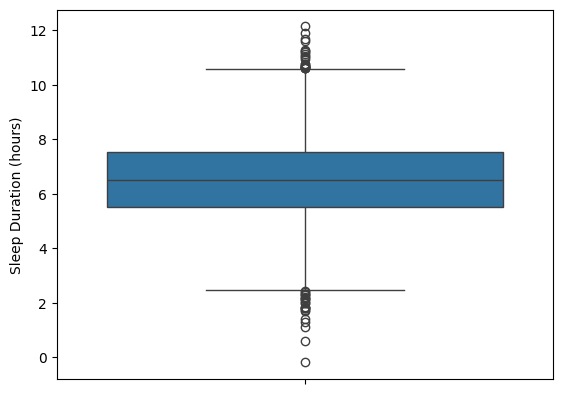

In [37]:
## use this space or additional cells to address the missing or outlier data. 
sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])


<Axes: xlabel='Sleep Duration (hours)', ylabel='Count'>

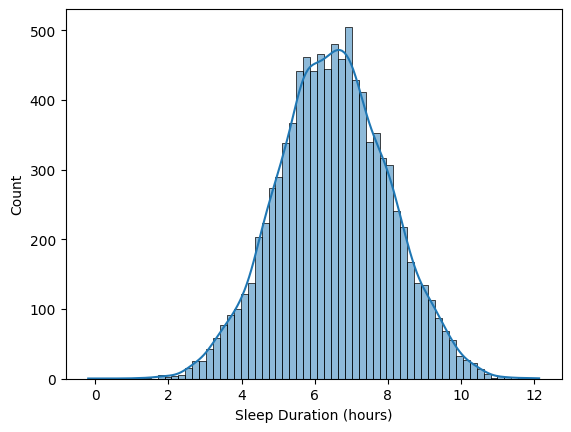

In [38]:
sns.histplot(smartwatch_sleep['Sleep Duration (hours)'], kde = True)
#pretty normally distributed without a lot of outliers

In [39]:
#use SD method for identifying outliers
stdSleep = smartwatch_sleep['Sleep Duration (hours)'].std()
print(stdSleep)

sleep_low = meanSleep - 3*stdSleep
sleep_up = meanSleep + 3*stdSleep 

#creating new df without outliers
sleepRows = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] < sleep_up) & (smartwatch_sleep['Sleep Duration (hours)'] > sleep_low) & (~smartwatch_sleep['Sleep Duration (hours)'].isnull())]
print(len(sleepRows))

sleepRowsMean = sleepRows['Sleep Duration (hours)'].mean()
#help for calculating 3 SD from mean 
#https://www.investopedia.com/terms/t/three-sigma-limits.asp 
#https://sandipanpaul.medium.com/missing-value-and-outlier-detection-in-short-903d745df401 



1.5100288357631744
9582


In [40]:
#mean imputations
outlierSleep = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] > sleep_up) | (smartwatch_sleep['Sleep Duration (hours)'] < sleep_low)]
nullSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
print(len(outlierSleep))
print(len(nullSleep))

#only going to do mean imp for null values, leave in the 21 outliers 
nullSleep_imp = nullSleep

nullSleep_imp['Sleep Duration (hours)'] = sleepRowsMean 

#combining together
sleep_meanimp = pd.concat([outlierSleep, nullSleep_imp, sleepRows])


#final answer
smartwatch_updated_sleep = sleep_meanimp
print(smartwatch_updated_sleep)

21
397
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2733   3003.0         53.224481               95.692628   5988.294291   
252    1709.0         77.099211               97.858090   3465.970911   
459    1658.0         65.173266               97.361383    960.362774   
2133   4401.0         91.964082               97.171460    652.741730   
2492   3936.0         73.018575              100.000000   3546.105365   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
2733               11.188196         Active            8 

/tmp/ipykernel_79182/4177917093.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleep_imp['Sleep Duration (hours)'] = sleepRowsMean


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [41]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
...

In [42]:
## cell to deal with 'Very High' value
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)
        print(type(item))

highTable = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == "Very High"]
highTable


Very High
<class 'str'>
nan
<class 'float'>


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1700,1777.0,63.996994,95.465595,14088.912805,6.507198,Highly Active,Very High
2421,4380.0,96.907879,97.099425,319.741554,6.507198,Sedentary,Very High
285,4152.0,65.108094,95.935126,5988.294291,7.240419,Active,Very High
3349,2079.0,65.576048,96.220124,5988.294291,6.218521,Actve,Very High
4713,1556.0,91.216912,98.777090,5988.294291,7.822021,Highly Active,Very High
5175,2681.0,83.416616,95.620551,5988.294291,9.264643,Active,Very High
2403,2980.0,86.049161,97.042221,5988.294291,6.045268,Highly Active,Very High
379,4170.0,70.455114,97.858090,4452.438735,5.428322,Seddentary,Very High
4302,2904.0,77.265298,97.858090,5015.965189,6.707009,Seddentary,Very High
5965,2962.0,79.300571,97.858090,2836.349664,4.120757,Seddentary,Very High


In [43]:
#replacing "Very High" with 10 
highTable['Stress Level'] = 10
highTable


/tmp/ipykernel_79182/2380615745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highTable['Stress Level'] = 10


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1700,1777.0,63.996994,95.465595,14088.912805,6.507198,Highly Active,10
2421,4380.0,96.907879,97.099425,319.741554,6.507198,Sedentary,10
285,4152.0,65.108094,95.935126,5988.294291,7.240419,Active,10
3349,2079.0,65.576048,96.220124,5988.294291,6.218521,Actve,10
4713,1556.0,91.216912,98.777090,5988.294291,7.822021,Highly Active,10
5175,2681.0,83.416616,95.620551,5988.294291,9.264643,Active,10
2403,2980.0,86.049161,97.042221,5988.294291,6.045268,Highly Active,10
379,4170.0,70.455114,97.858090,4452.438735,5.428322,Seddentary,10
4302,2904.0,77.265298,97.858090,5015.965189,6.707009,Seddentary,10
5965,2962.0,79.300571,97.858090,2836.349664,4.120757,Seddentary,10


In [44]:
smartwatch_stress_nohigh = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] != "Very High"]
smartwatch_stress_nohigh

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2733,3003.0,53.224481,95.692628,5988.294291,11.188196,Active,8
252,1709.0,77.099211,97.858090,3465.970911,1.108614,Highly Active,9
459,1658.0,65.173266,97.361383,960.362774,12.140233,Active,3
2133,4401.0,91.964082,97.171460,652.741730,1.402507,Actve,1
2492,3936.0,73.018575,100.000000,3546.105365,0.589987,Actve,3
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


In [45]:
#ading back the highTable with newly converted "Very High"
smartwatch_fixed_stress = smartwatch_updated_sleep

smartwatch_fixed_stress = pd.concat([smartwatch_stress_nohigh, highTable])
smartwatch_fixed_stress['Stress Level'] = smartwatch_fixed_stress['Stress Level'].astype(float) #making sure it is float type

In [46]:
minStress = smartwatch_fixed_stress['Stress Level'].min()
maxStress = smartwatch_fixed_stress['Stress Level'].max()
meanStress = smartwatch_fixed_stress['Stress Level'].mean()

minStress, maxStress, meanStress

(np.float64(1.0), np.float64(10.0), np.float64(5.486734693877551))

<Axes: ylabel='Stress Level'>

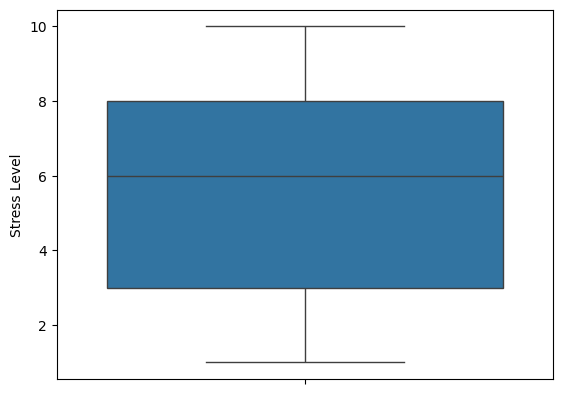

In [47]:
#boxplot 
sns.boxplot(smartwatch_fixed_stress['Stress Level'])

In [48]:
#find how many null values 
nullStressRows = smartwatch_fixed_stress[smartwatch_fixed_stress['Stress Level'].isnull()]
len(nullStressRows)
nullStressRows

#mean impute 
nullStress_imp = nullStressRows

nullStress_imp['Stress Level'] = meanStress
nullStress_imp

#adding back to original 
stressRows = smartwatch_fixed_stress[(~smartwatch_fixed_stress['Stress Level'].isnull())]

stress_imp = pd.concat([nullStress_imp, stressRows])
stress_imp

/tmp/ipykernel_79182/2182186226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullStress_imp['Stress Level'] = meanStress


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3919,NaN,46.812987,95.234249,7893.183565,6.507198,Highly_Active,5.486735
5596,3871.0,71.320880,99.228302,3498.719211,6.507198,Actve,5.486735
6127,4821.0,89.024555,96.138871,4261.951634,6.507198,Actve,5.486735
6165,4601.0,79.244143,96.013915,2311.324740,6.507198,Actve,5.486735
7383,1871.0,61.256883,97.491386,5085.035828,6.507198,Highly Active,5.486735
...,...,...,...,...,...,...,...
8482,1890.0,65.616368,98.879327,2700.965039,3.837395,Active,10.000000
9010,2714.0,94.360519,96.731081,879.418998,6.510494,Seddentary,10.000000
9656,1566.0,95.945551,100.000000,1350.867640,5.781571,Highly Active,10.000000
9772,4122.0,50.269429,98.602140,16865.919678,2.737993,Actve,10.000000


In [49]:
#final answer with mean imputation for NA values
smartwatch_stress = stress_imp

smartwatch_stress


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3919,NaN,46.812987,95.234249,7893.183565,6.507198,Highly_Active,5.486735
5596,3871.0,71.320880,99.228302,3498.719211,6.507198,Actve,5.486735
6127,4821.0,89.024555,96.138871,4261.951634,6.507198,Actve,5.486735
6165,4601.0,79.244143,96.013915,2311.324740,6.507198,Actve,5.486735
7383,1871.0,61.256883,97.491386,5085.035828,6.507198,Highly Active,5.486735
...,...,...,...,...,...,...,...
8482,1890.0,65.616368,98.879327,2700.965039,3.837395,Active,10.000000
9010,2714.0,94.360519,96.731081,879.418998,6.510494,Seddentary,10.000000
9656,1566.0,95.945551,100.000000,1350.867640,5.781571,Highly Active,10.000000
9772,4122.0,50.269429,98.602140,16865.919678,2.737993,Actve,10.000000


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [50]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [51]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active' ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == "Actve") | (smartwatch_stress['Activity Level'] == "Active")]
active['Activity Level'] = "Active"
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == "Sedentary") | (smartwatch_stress['Activity Level'] == "Seddentary")]
sedentary['Activty Level'] = "sedentary"
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_79182/4192800760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active' ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_79182/4192800760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_79182/4192800760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity,Activty Level
3919,NaN,46.812987,95.234249,7893.183565,6.507198,Highly Active,5.486735,1.0,NaN
7383,1871.0,61.256883,97.491386,5085.035828,6.507198,Highly Active,5.486735,1.0,NaN
8774,4870.0,52.634964,97.971538,15906.886529,6.507198,Highly Active,5.486735,1.0,NaN
2955,2838.0,81.468921,96.615713,5988.294291,6.031539,Highly Active,5.486735,1.0,NaN
5130,1470.0,84.529749,97.786892,5988.294291,5.965551,Highly Active,5.486735,1.0,NaN
...,...,...,...,...,...,...,...,...,...
9842,2108.0,71.152455,98.585987,1480.777008,8.379498,NaN,9.000000,NaN,NaN
9845,4203.0,91.417098,95.383875,1238.788704,6.226965,NaN,7.000000,NaN,NaN
9867,2674.0,69.075313,99.067026,2759.328767,4.919706,NaN,5.000000,NaN,NaN
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8.000000,NaN,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [52]:
final_table.isnull().sum()

User ID                    201
Heart Rate (BPM)             0
Blood Oxygen Level (%)       0
Step Count                   0
Sleep Duration (hours)       0
Activity Level             200
Stress Level                 0
NumActivity                200
Activty Level             6667
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [53]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3919 to 9991
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            10000 non-null  float64
 7   NumActivity             9800 non-null   float64
 8   Activty Level           3333 non-null   object 
dtypes: float64(7), object(2)
memory usage: 781.2+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

There does not seem to be a strong relationship between Step Count and Heart Rate. There is a cross that is showing up I think due to the mean imputation that was used on outliers for both measures.

...

Text(0, 0.5, 'Heart Rate (BPM)')

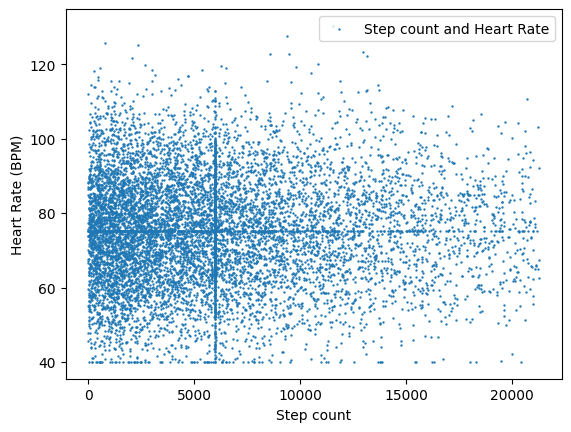

In [54]:
#creating a scatterplot

plt.scatter(final_table['Step Count'], final_table['Heart Rate (BPM)'], label = "Step count and Heart Rate", s = .5)
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Heart Rate (BPM)")

#citations
#https://stackoverflow.com/questions/42223587/how-to-add-title-and-xlabel-and-ylabel

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: The points, while the general shape remains the same, is much more spread out. This is especially apparent in the Step Count axis, because there were some really big outliers. But the Heart Rate also has some outliers that make it seem like some of them would be dead, becauses a heart rate that low wouldn't be possible. The cross made by the mean imputation is also gone, which makes me think if I were to do this in a more official capacity I would not choose mean imputation next time. I think that cross makes it more difficult to see the relationship between the two variables. 

...

In [55]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

Text(0, 0.5, 'Heart Rate (BPM)')

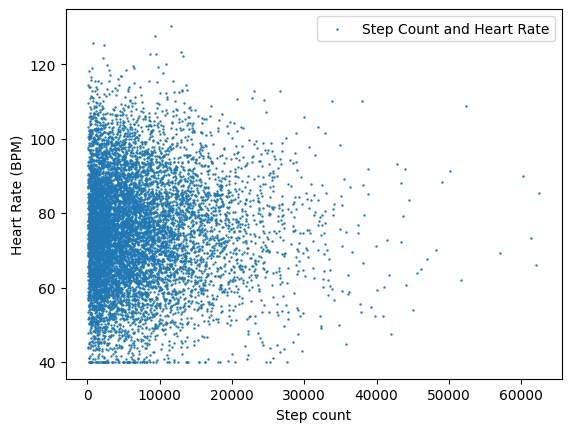

In [56]:
plt.scatter(nanTable['Step Count'], nanTable['Heart Rate (BPM)'], s = .5, label = "Step Count and Heart Rate")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Heart Rate (BPM)")

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Step Count'>

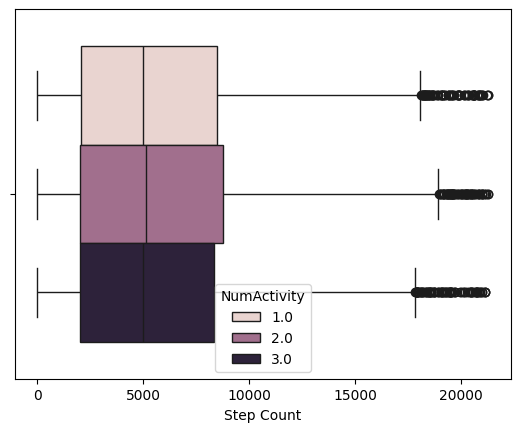

In [59]:
## Visualization 

sns.boxplot(x = "Step Count", hue = "NumActivity", data = final_table)


In [61]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[(final_table['NumActivity'] == 3)]  ## sedentary rows
act = final_table[(final_table['NumActivity'] == 2)] ## active rows
hact = final_table[(final_table['NumActivity'] == 1)] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 1.369, p-value: 0.254


Is there significant difference between the groups' step counts?  

ANSWER: No there is no significant difference bewteen the three activity groups according to the p-value, as the p-value > .05. This means that we cannot be sure that the differences we see between the three activity level groups is due to random chance. 

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

According to the data collected, there are no significant difference between the categorical level of activity level and teh amount of steps taken each day. This suggests (1) that there perhaps step count is not an accurate way to assess activity level and (2) there may need to be changes to how activity level is being calculated. 

There are some limitations with these methods however. First, there were over 100 missing or outlier data points in Step Count which were dealt with through mean imputation. Outlier data was determined through the IQR method, given the skewed nature of the data. This mean that I found over 200 outliers, which were then replaced through mean imputation. However, since outliers were taken out, this may not represent the entire range of mobility among participants. Therefore, these results can only be interpreted when considering the average step count. These results may also reinforce bias especially around disability, as fitness data is often very different for those with limited mobility. Furthermore, the activity level groups were likely determmined based off of able-bodied, average data, which also does not account for the full diversity of physical ability. Therefore, we can only conclude that step count and activity level are not significantly different excluding outliers and missing data. 

....